# PROJET DE MACHINE LEARNING : AMADEUS

L'objectif de ce projet est de mettre en place un modèle de Machine Learning permettant de prédire un Burn_out

### A- IMPORTATION DES PACKAGES ET MODULES 

In [1]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.ensemble import IsolationForest
import warnings
# warnings.filterwarnings('ignore')

### B- IMPORTATION DES DONNEES 

In [2]:
dataset = pd.read_csv("AMADEUS.csv")
dataset.head()

,Séquentiel,SID,Heure de complétion,1statutactuel,Profession category,MEDIDEASCADRE,STATUTPRO4CAT,MEDIDEvsASCADRE,MEDECIN_ALL,INTERNE,...,PSQI_QUALITE_CONTINU,PSQI_MAUVAISE_QUALITE_BIN,"125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?",HYPNOTIQUES,"126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?","127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?",SOMNOLENCE_MOD_SEVERE,MOTIVATION_DEFICIT_MOD_SEVERE+II4,128DIFF_FINANCE,129REMUNERATION_JUSTE_VALEUR
0,26,8424666,4/26/21 16:39,Médecin : PH titulaire,Physician,1,Physician,1.0,1,0,...,2,1,0,0,0,0,0,0,NaN,NaN
1,27,8437258,4/27/21 15:00,Infirmier Diplômé d'Etat,Nurse,1,Nurse,1.0,0,0,...,2,1,2,1,1,1,0,0,NaN,NaN
2,28,8437467,4/27/21 15:11,Médecin : PH titulaire,Physician,1,Physician,1.0,1,0,...,2,1,3,1,0,2,0,1,NaN,NaN
3,29,8437725,4/27/21 15:23,Médecin : Interne en médecine (incluant intern...,Physician,1,Physician,1.0,1,1,...,2,1,1,1,1,1,0,0,NaN,NaN
4,30,8438934,4/27/21 16:24,Infirmier Diplômé d'Etat,Nurse,1,Nurse,1.0,0,0,...,2,1,1,1,1,2,0,1,NaN,NaN


###  C- DATA ENGINIEERING

In [3]:
# Affichage des colonnes ou des variables de mon dataset

print(dataset.columns.tolist())

['Séquentiel', 'SID', 'Heure de complétion', '1statutactuel', 'Profession category', 'MEDIDEASCADRE', 'STATUTPRO4CAT', 'MEDIDEvsASCADRE', 'MEDECIN_ALL', 'INTERNE', 'IDE', 'AS', 'CADRE_IDE', 'CADRE_SUP', 'CADRE_IDEETSUP', 'CADRE_CADRESUP_ALL', 'PHARMACIEN', 'PSYCHO', 'SAGEFEMME', 'KINE', 'ERGO', 'DIRECTEURSOINS', 'MED_CDD_VS_CDI_PUBLIC', 'MED_PUBLIC_VS_PRIVE', 'IADE_IBODE_VS_AUTREIDE', '2. Quel âge avez-vous ?', '3. Votre sexe biologique :', 'SEX_M', '4. Votre genre psychique:', 'NON_BINAIRE', 'GENRE_M', 'taille', 'poids', 'IMC', 'SURPOIDS_OBESITE', 'OBESITE', 'codepostal', 'secteur_categories', 'PUBLICETEPBNL_VS_PRIVE', 'PUBLIC_VS_PRIVE_ET_EPBNL', '9. Exercez-vous dans un établissement', 'SANITAIRE_VS_MEDICOSOCIAL', 'ANCIENNETE', 'ANCIENNETE_1AN_OU_MOINS', '11conjoint_domicile', '12enfants_nb', 'ENFANT_BIN', '13reconfort_entourage', '14proche_aidant', 'service_COVID19', 'Anatomopathologie', 'Anesthésie', 'Biologie médicale', 'Chirurgie tête et cou', 'Chirurgie générale', 'Chirurgie inf

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10325 entries, 0 to 10324
Columns: 237 entries, Séquentiel to 129REMUNERATION_JUSTE_VALEUR
dtypes: float64(16), int64(206), object(15)
memory usage: 18.7+ MB


In [5]:
dataset.isnull().sum()

Séquentiel                                                                                                                                   0
SID                                                                                                                                          0
Heure de complétion                                                                                                                          0
1statutactuel                                                                                                                                0
Profession category                                                                                                                          0
                                                                                                                                          ... 
127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?       0

In [6]:
dataset.shape

(10325, 237)

##### Commentaire : 
Mon dataset compte 10325 individus et 237 variables.
Mais nous n'utiliserons pas toutes les 237 variables donc nous allons subseter les variables qui nous intèrèsse

#### 1- CHOIX DE MES VARIABLES 

In [7]:
df = dataset[['2. Quel âge avez-vous ?','SEX_M','IMC','PUBLIC_VS_PRIVE_ET_EPBNL','ANCIENNETE','11conjoint_domicile','ENFANT_BIN',
'13reconfort_entourage','14proche_aidant','service_COVID19','Anatomopathologie','Anesthésie','Biologie médicale',
'Chirurgie tête et cou','Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 
'Chirurgie Maxillo-faciale','Chirurgie: Neurochirurgie','Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 
'Chirurgie thoracique et cardiologique','Chirurgie Viscérale et Digestive','Chirurgie Urologique', 'Chirurgie Vasculaire',
'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 
'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 
'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale','Médecine : Infectiologie', 'Médecine Interne',
'Médecine: Néphrologie', 'Médecine : Neurologie','Médecine Nucléaire', 'Médecine : Ophtalmologie', 'Médecine : Oncologie', 
'Médecine : Oto-Rhino-Laryngologie ( ORL)', 'Médecine : Pédiatrie (Néonatologie)', 'Médecine : Pédiatrie (hors néonatologie)', 
'Médecine Physique et de Réadaptation', 'Médecine : Pneumologie', 'Médecine: Radiologie', 'Médecine : Rhumatologie', 'Médecine : Soins palliatifs',
'Médecine : Stomatologie', 'Médecine du travail', 'Médecine: Urgences', 'Médecine: Urgences préhospitalières (SAMU)', 'Médecine Vasculaire / angiologie', 
'Psychiatrie adulte','Psychiatrie: pédopsychiatrie et enfance inadaptée', 'Soins critiques : Réanimation', 'Soins critiques : soins continus ou soins intensifs polyvalents', 'Soins critiques : soins intensifs', 
'Santé Publique', "Service d'Information Médicale", 'Service qualité et gestion des risques', '16TEMPS_COMPLET', '17POSTE_DE_NUIT', 
'18GARDES_NUIT', '19HORAIRES_CONSTANTS', '21PLANNING_2SEM_CONNU', '22DEPASSEMENT_HORAIRE_PREVU_FQC', '23WKEND_W_MOIS_NB', '24ARRET_NB_J_LASTYEAR', 
'25MALADIE_CHRONIQUE', '26ALD','KARASEK_QUANTITE_RAPIDITE', 'KARASEK_COMPLEXITE_INTENSITE','KARASEK_MORCELLEMENT_IMPREVISIBILITE',
'KARASEK_LATITUDE_MARGEMANOEUVRE', 'KARASEK_UTILISATION_COMPETENCE', 'KARASEK_DVLPT_COMPETENCE', 
'KARASEK_SOUTIEN_PRO_SUPERIEURS', 'KARASEK_SOUTIEN_PRO_COLLEGUES', 'KARASEK_SOUTIEN_EMO_SUPERIEURS', 'KARASEK_SOUTIEN_EM0_COLLEGUES', 
 '75CRAINTE_ERREUR_FQC', '76HARCELEMENT_MORAL','78HARCELEMENT_SEXUEL','80SOBD','81EDM_LIFETIME_NB','82ATD', '83ANXIO', '84PSYCHOSTIM',
 '85SUIVI_PSY4', '86SUIVI_PSYCHO', '87NB_CIG', '88CAFE_TASSES','DETA_CUTOFF2','METS_MIN_SEMAINE','CESD1', 'CESD2', 'CESD3', 'CESD5', 'CESD6', 'CESD7',
'CESD9', 'CESD10', 'CESD11', 'CESD13', 'CESD14', 'CESD15','CESD17', 'CESD18', 'CESD19', 'CESD20', 'CESD4', 'CESD8', 'CESD12', 'CESD16', 
'120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?', 
'122.DUREE_SOMM_CONTINU','PSQI_TBSOMMEIL_CONTINU',  'PSQI_QUALITE_CONTINU', 
'125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?',
'126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?',
'127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?','BURNOUT_BIN']]


In [8]:
df

,2. Quel âge avez-vous ?,SEX_M,IMC,PUBLIC_VS_PRIVE_ET_EPBNL,ANCIENNETE,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,...,CESD12,CESD16,"120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?",122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,"125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?","126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?","127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?",BURNOUT_BIN
0,39,1,"24,69135802",1,"10,00",1,0,1,0,0,...,0,0,5.0,"6,5",10,2,0,0,0,0
1,26,0,"21,75546853",1,"4,00",0,0,1,0,0,...,0,2,120.0,5,8,2,2,1,1,0
2,35,0,"16,32653061",1,"6,00",0,0,1,0,0,...,3,3,20.0,6,11,2,3,0,2,0
3,28,0,"23,87511478",1,"4,00",0,0,1,0,0,...,3,3,30.0,6,6,2,1,1,1,0
4,31,0,"18,96192742",1,"6,00",1,0,0,0,0,...,2,3,15.0,7,14,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,58,0,"24,45606342",1,"30,00",0,1,1,0,0,...,0,0,15.0,6,9,2,0,3,1,0
10321,40,0,"21,73650525",0,"7,00",0,1,1,1,0,...,0,0,10.0,"6,5",0,1,0,0,0,0
10322,30,0,25,1,"3,00",0,0,1,0,0,...,0,1,15.0,7,13,1,1,2,1,1
10323,39,0,"27,63605442",1,"5,00",1,1,1,0,0,...,0,0,5.0,"7,5",7,1,0,0,1,0


In [9]:
df.shape

(10325, 129)

Après le choix de nos variables nous voyons que nous avons fait 129 variables mais toujours avec 10325 individus

#### 2-  Renommer certaines variables à cause de leurs longueurs 

In [10]:
df1 = df.copy()  # Create copy of DataFrame

In [11]:
df1 = df1.rename(columns = {"2. Quel âge avez-vous ?" : "Age","SEX_M": "Sexe","120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?": 
"Q120", "125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?": "Q125",
"126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?": "Q126", 
"127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?": "Q127","BURNOUT_BIN":"Y"})  # Using rename()

In [12]:
df1

,Age,Sexe,IMC,PUBLIC_VS_PRIVE_ET_EPBNL,ANCIENNETE,11conjoint_domicile,ENFANT_BIN,13reconfort_entourage,14proche_aidant,service_COVID19,...,CESD12,CESD16,Q120,122.DUREE_SOMM_CONTINU,PSQI_TBSOMMEIL_CONTINU,PSQI_QUALITE_CONTINU,Q125,Q126,Q127,Y
0,39,1,"24,69135802",1,"10,00",1,0,1,0,0,...,0,0,5.0,"6,5",10,2,0,0,0,0
1,26,0,"21,75546853",1,"4,00",0,0,1,0,0,...,0,2,120.0,5,8,2,2,1,1,0
2,35,0,"16,32653061",1,"6,00",0,0,1,0,0,...,3,3,20.0,6,11,2,3,0,2,0
3,28,0,"23,87511478",1,"4,00",0,0,1,0,0,...,3,3,30.0,6,6,2,1,1,1,0
4,31,0,"18,96192742",1,"6,00",1,0,0,0,0,...,2,3,15.0,7,14,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10320,58,0,"24,45606342",1,"30,00",0,1,1,0,0,...,0,0,15.0,6,9,2,0,3,1,0
10321,40,0,"21,73650525",0,"7,00",0,1,1,1,0,...,0,0,10.0,"6,5",0,1,0,0,0,0
10322,30,0,25,1,"3,00",0,0,1,0,0,...,0,1,15.0,7,13,1,1,2,1,1
10323,39,0,"27,63605442",1,"5,00",1,1,1,0,0,...,0,0,5.0,"7,5",7,1,0,0,1,0


# SIGNIFICATION DE CHAQUE VARIABLE 

In [13]:
df1.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtyp

##### Commentaire : 
Nous avons vérifié le type de nos variables afin de nous assurer qu'ils sont tous des numériques ou des floatés mais ci-dessus nous voyons qu'il y a 4 variables qui sont des objets donc nous allons changer leur type

In [14]:
df.select_dtypes(object).columns

Index(['IMC', 'ANCIENNETE', 'METS_MIN_SEMAINE', '122.DUREE_SOMM_CONTINU'], dtype='object')

### 1ère variable :     IMC

In [15]:
df1['IMC']

0        24,69135802
1        21,75546853
2        16,32653061
3        23,87511478
4        18,96192742
            ...     
10320    24,45606342
10321    21,73650525
10322             25
10323    27,63605442
10324    18,16620425
Name: IMC, Length: 10325, dtype: object

In [16]:
df1['IMC']=df1['IMC'].apply(lambda x: str(x).replace(",", "."))
df1['IMC']=df1['IMC'].astype(float)

In [17]:
df1['IMC']

0        24.691358
1        21.755469
2        16.326531
3        23.875115
4        18.961927
           ...    
10320    24.456063
10321    21.736505
10322    25.000000
10323    27.636054
10324    18.166204
Name: IMC, Length: 10325, dtype: float64

### 2éme variable :  ANCIENNETE

In [18]:
df1['ANCIENNETE']

0        10,00
1         4,00
2         6,00
3         4,00
4         6,00
         ...  
10320    30,00
10321     7,00
10322     3,00
10323     5,00
10324    21,00
Name: ANCIENNETE, Length: 10325, dtype: object

In [19]:
df1['ANCIENNETE']=df1['ANCIENNETE'].apply(lambda x: str(x).replace(",", "."))
df1['ANCIENNETE']=df1['ANCIENNETE'].astype(float)

In [20]:
df1['ANCIENNETE']

0        10.0
1         4.0
2         6.0
3         4.0
4         6.0
         ... 
10320    30.0
10321     7.0
10322     3.0
10323     5.0
10324    21.0
Name: ANCIENNETE, Length: 10325, dtype: float64

### 3éme variable :  METS_MIN_SEMAINE

In [21]:
df1['METS_MIN_SEMAINE']

0           960
1           891
2        2212,5
3         586,5
4          3660
          ...  
10320      7572
10321     817,5
10322    2209,5
10323      1074
10324       153
Name: METS_MIN_SEMAINE, Length: 10325, dtype: object

In [22]:
df1['METS_MIN_SEMAINE']=df1['METS_MIN_SEMAINE'].apply(lambda x: str(x).replace(",", "."))
df1['METS_MIN_SEMAINE']=df1['METS_MIN_SEMAINE'].astype(float)

In [23]:
df1['METS_MIN_SEMAINE']

0         960.0
1         891.0
2        2212.5
3         586.5
4        3660.0
          ...  
10320    7572.0
10321     817.5
10322    2209.5
10323    1074.0
10324     153.0
Name: METS_MIN_SEMAINE, Length: 10325, dtype: float64

### 4éme variable :  122.DUREE_SOMM_CONTINU

In [24]:
df1['122.DUREE_SOMM_CONTINU']

0        6,5
1          5
2          6
3          6
4          7
        ... 
10320      6
10321    6,5
10322      7
10323    7,5
10324      6
Name: 122.DUREE_SOMM_CONTINU, Length: 10325, dtype: object

In [25]:
df1['122.DUREE_SOMM_CONTINU']=df1['122.DUREE_SOMM_CONTINU'].apply(lambda x: str(x).replace(",", "."))
df1['122.DUREE_SOMM_CONTINU']=df1['122.DUREE_SOMM_CONTINU'].astype(float)

In [26]:
df1['122.DUREE_SOMM_CONTINU']

0        6.5
1        5.0
2        6.0
3        6.0
4        7.0
        ... 
10320    6.0
10321    6.5
10322    7.0
10323    7.5
10324    6.0
Name: 122.DUREE_SOMM_CONTINU, Length: 10325, dtype: float64

In [27]:
df1.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('in

In [28]:
print(df1.columns.tolist())

['Age', 'Sexe', 'IMC', 'PUBLIC_VS_PRIVE_ET_EPBNL', 'ANCIENNETE', '11conjoint_domicile', 'ENFANT_BIN', '13reconfort_entourage', '14proche_aidant', 'service_COVID19', 'Anatomopathologie', 'Anesthésie', 'Biologie médicale', 'Chirurgie tête et cou', 'Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 'Chirurgie Maxillo-faciale', 'Chirurgie: Neurochirurgie', 'Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 'Chirurgie thoracique et cardiologique', 'Chirurgie Viscérale et Digestive', 'Chirurgie Urologique', 'Chirurgie Vasculaire', 'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale', 'Médecine : Infectiologie', 'Médecine Interne', 'Médecine: 

##### Commentaire : 
Donc nous avons toutes nos variables qui sont des variables quantitatives 

## 3- Regard sur la distribution de certaines variables 

In [29]:
# [O] pour les femmes 
# [1] pour les hommes 

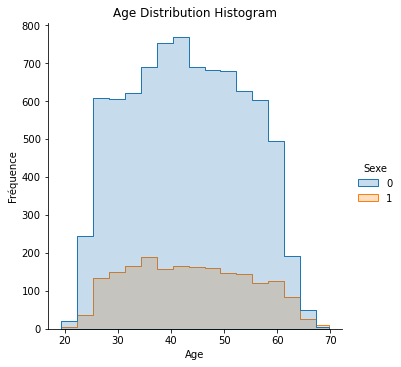

In [30]:
sns.displot(df1, x="Age",binwidth=3,shrink=.8,hue="Sexe",element="step")
plt.xlabel("Age")
plt.ylabel("Fréquence")
plt.title("Age Distribution Histogram")
plt.show()

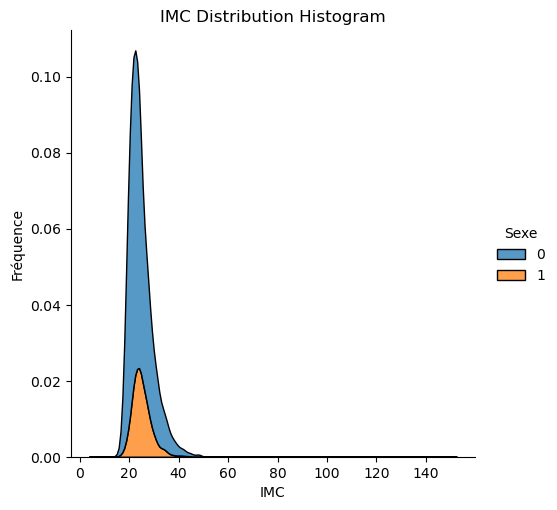

In [31]:
sns.displot(df1, x="IMC", hue="Sexe", kind="kde", multiple="stack")
plt.xlabel("IMC")
plt.ylabel("Fréquence")
plt.title("IMC Distribution Histogram")
plt.show()

<AxesSubplot:title={'center':'Sexe'}, ylabel='Frequency'>

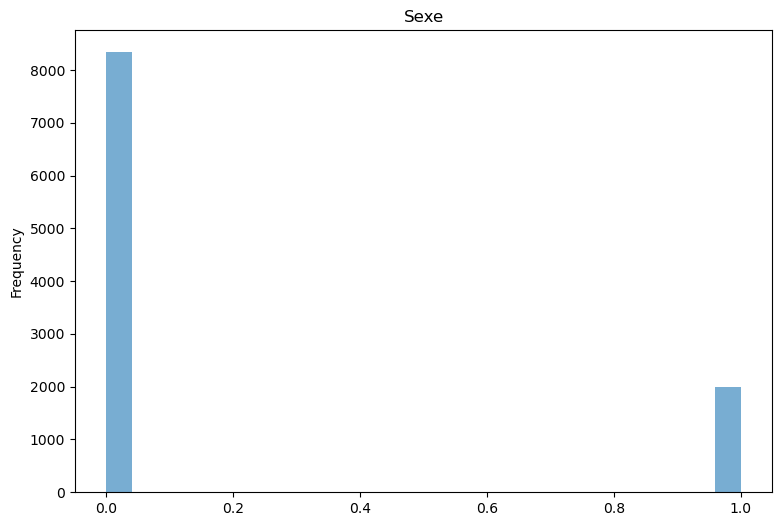

In [32]:
df1['Sexe'].plot(kind='hist', bins=25, alpha=0.6, figsize=(9,6),title='Sexe')

vOIR SI J'ai plus d'hommes qui ont de burn out ou pas

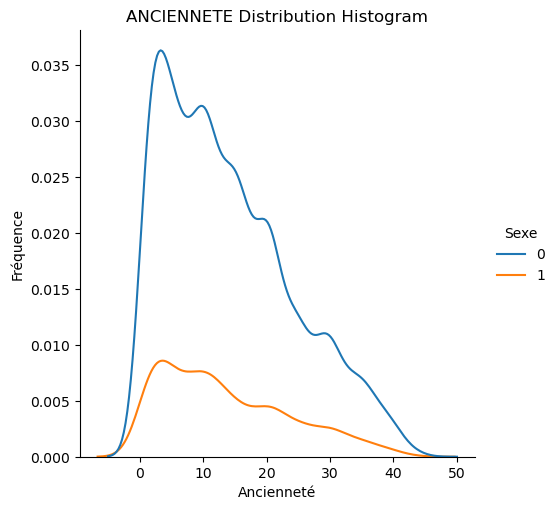

In [33]:
sns.displot(df1, x="ANCIENNETE", hue="Sexe", kind="kde")
plt.xlabel("Ancienneté")
plt.ylabel("Fréquence")
plt.title("ANCIENNETE Distribution Histogram")
plt.show()

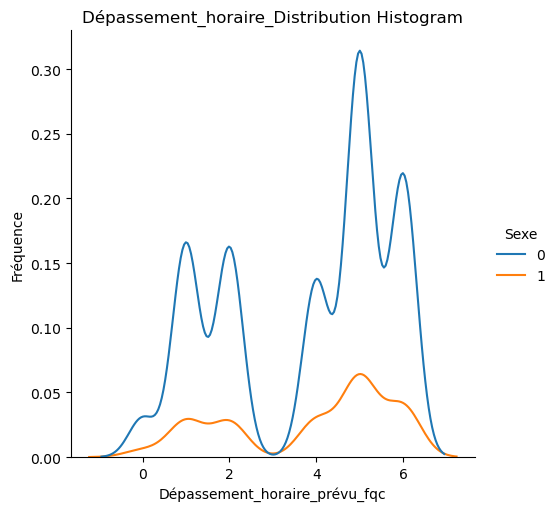

In [34]:
sns.displot(df1, x='22DEPASSEMENT_HORAIRE_PREVU_FQC', hue="Sexe", kind="kde")
plt.xlabel("Dépassement_horaire_prévu_fqc")
plt.ylabel("Fréquence")
plt.title("Dépassement_horaire_Distribution Histogram")
plt.show()

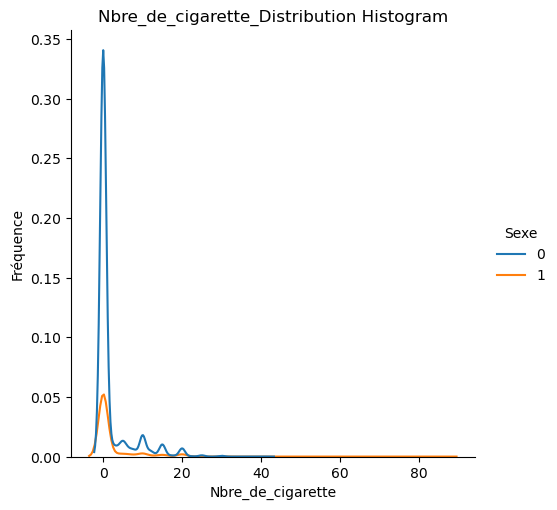

In [35]:
sns.displot(df1, x='87NB_CIG', hue="Sexe", kind="kde")
plt.xlabel("Nbre_de_cigarette")
plt.ylabel("Fréquence")
plt.title("Nbre_de_cigarette_Distribution Histogram")
plt.show()

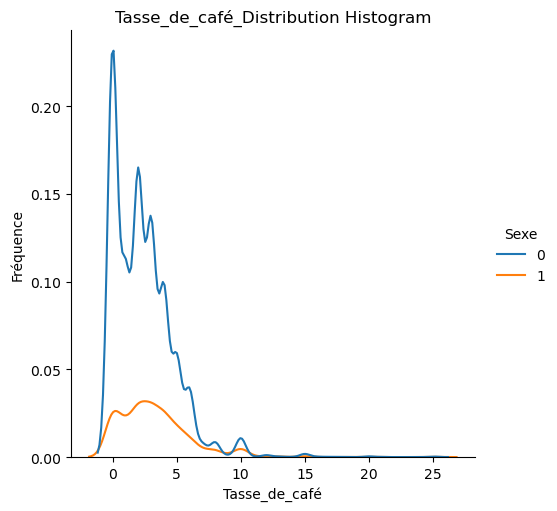

In [36]:
sns.displot(df1, x='88CAFE_TASSES', hue="Sexe", kind="kde")
plt.xlabel("Tasse_de_café")
plt.ylabel("Fréquence")
plt.title("Tasse_de_café_Distribution Histogram")
plt.show()

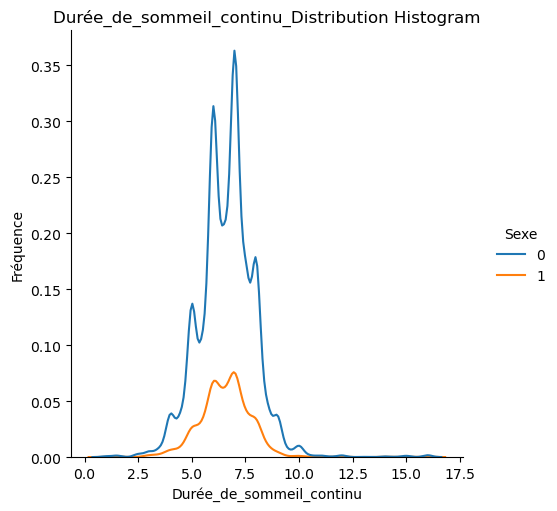

In [37]:
sns.displot(df1, x='122.DUREE_SOMM_CONTINU', hue="Sexe", kind="kde")
plt.xlabel("Durée_de_sommeil_continu")
plt.ylabel("Fréquence")
plt.title("Durée_de_sommeil_continu_Distribution Histogram")
plt.show()

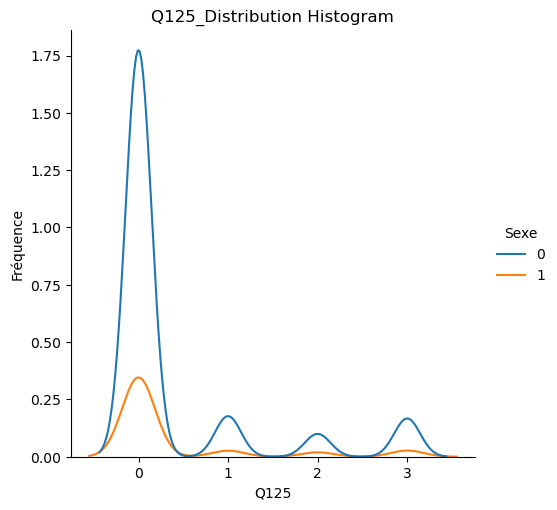

In [38]:
sns.displot(df1, x='Q125', hue="Sexe", kind="kde")
plt.xlabel("Q125")
plt.ylabel("Fréquence")
plt.title("Q125_Distribution Histogram")
plt.show()
#125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?'

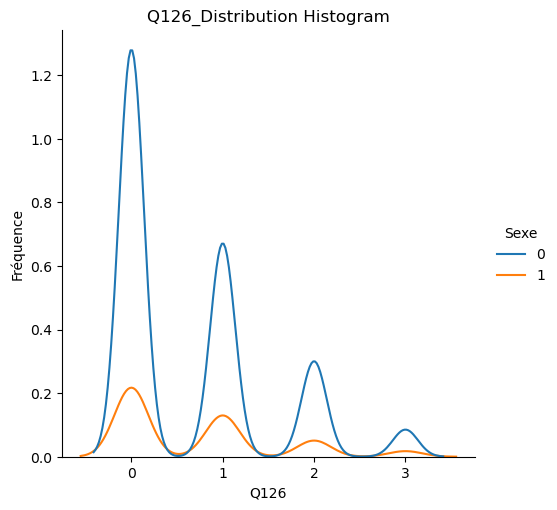

In [39]:
sns.displot(df1, x='Q126', hue="Sexe", kind="kde")
plt.xlabel("Q126")
plt.ylabel("Fréquence")
plt.title("Q126_Distribution Histogram")
plt.show()
#'126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?'

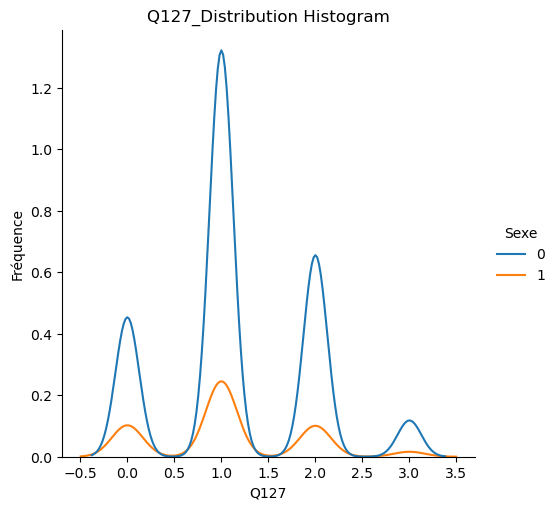

In [40]:
sns.displot(df1, x='Q127', hue="Sexe", kind="kde")
plt.xlabel("Q127")
plt.ylabel("Fréquence")
plt.title("Q127_Distribution Histogram")
plt.show()
#127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?'

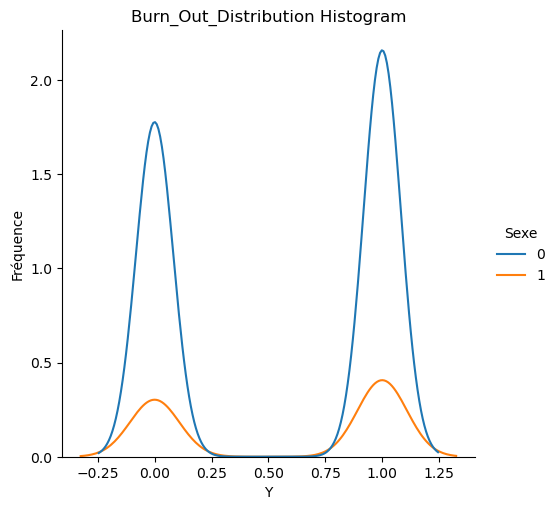

In [41]:
sns.displot(df1, x='Y', hue="Sexe", kind="kde")
plt.xlabel("Y")
plt.ylabel("Fréquence")
plt.title("Burn_Out_Distribution Histogram")
plt.show()


#### 3-  Gestion des données manquantes

In [42]:
df1.isnull().sum()[df1.isnull().sum()>0]

18GARDES_NUIT             118
Q120                        4
122.DUREE_SOMM_CONTINU    140
dtype: int64

##### Commentaire : 
Nous avons 3 variables dans notre dataframe qui ont respectivement 118, 4 et 140 données manquantes

In [43]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    #display (missing_data[(percent>0)])
    return missing_data[(percent>0)]

In [44]:
missing_values(df1).T
#le T c'est pour transposer la table 

,122.DUREE_SOMM_CONTINU,18GARDES_NUIT,Q120
Total,140.000000,118.000000,4.000000
Pourcentage,0.013559,0.011429,0.000387


### Machine Learning Superviséé

### 1ère Partie  : Data_préprocessing

Imputation par la moyenne

In [45]:
# Etant donné que j'ai des données manquantes dans mon dataframe je les remplace par la moyenne de la variable concernée 

In [46]:
df1["122.DUREE_SOMM_CONTINU"].mean()

6.616789396170839

In [47]:
df1.fillna(df1.mean(),inplace=True)

In [48]:
missing_values(df1).T
#le T c'est pour transposer la table 

""
Total
Pourcentage


In [49]:
df1.select_dtypes(object).columns

Index([], dtype='object')

In [50]:
# 1) Créer une matrice des variables indépendantes et le vecteur de la variable dépendante.
# X est la matrice et Y est le vecteur
# PS: Astuce : Très souvent la dernière colonne est la colonne dépendante le y à prédire
# La matrice des variables indépendantes est aussi appeelée matrice de features

In [51]:
X = df1.iloc[:, :-1].values
# Faisons la même chose avec Y
Y = df1.iloc[:, -1].values

In [52]:
X

array([[39.        ,  1.        , 24.69135802, ...,  0.        ,
         0.        ,  0.        ],
       [26.        ,  0.        , 21.75546853, ...,  2.        ,
         1.        ,  1.        ],
       [35.        ,  0.        , 16.32653061, ...,  3.        ,
         0.        ,  2.        ],
       ...,
       [30.        ,  0.        , 25.        , ...,  1.        ,
         2.        ,  1.        ],
       [39.        ,  0.        , 27.63605442, ...,  0.        ,
         0.        ,  1.        ],
       [46.        ,  0.        , 18.16620425, ...,  1.        ,
         0.        ,  1.        ]])

In [53]:
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### e) Séparation du dataset en training_set et en test_set

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 0)

In [55]:
#Vérifionsla proportion des 1 et des 0 dans mon Y

In [56]:
np.unique(Y,return_counts=True)

(array([0, 1], dtype=int64), array([4613, 5712], dtype=int64))

In [57]:
df1.shape

(10325, 129)

In [58]:
df1['Y']

0        0
1        0
2        0
3        0
4        0
        ..
10320    0
10321    0
10322    1
10323    0
10324    0
Name: Y, Length: 10325, dtype: int64

In [59]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[27.          1.         23.37472608 ...  0.          0.
   0.        ]
 [43.          1.         22.39541342 ...  0.          1.
   1.        ]
 [44.          0.         19.28937927 ...  0.          0.
   1.        ]
 ...
 [59.          0.         22.49134948 ...  0.          0.
   0.        ]
 [39.          0.         25.34435262 ...  0.          1.
   2.        ]
 [55.          1.         21.87755102 ...  2.          0.
   3.        ]]
[[33.          0.         22.58270917 ...  0.          0.
   0.        ]
 [51.          0.         25.5588462  ...  3.          0.
   1.        ]
 [35.          1.         20.19557823 ...  0.          1.
   1.        ]
 ...
 [43.          0.         28.88888889 ...  0.          0.
   2.        ]
 [57.          0.         27.09925101 ...  0.          0.
   3.        ]
 [46.          0.         19.53125    ...  0.          0.
   2.        ]]
[0 0 0 ... 0 1 1]
[0 0 0 ... 1 1 1]


In [60]:
# g) le feature scaling c'est à dire mettre toutes nos variables(variables indépendantes et dépendantes sous la même échelle)
#Le but du feature scaling est de mettre toutes nos variables sur la même échelle afin que nos variables ne s'écrasent pas entres elles dans les équations de ML

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Lier notre objet à ce qu'on veut transformer 

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-1.401383,2.043389,-0.225710,0.397285,-1.073893,0.590026,-1.190812,-2.703675,-0.474123,-0.316249,...,-1.119547,-0.932532,-1.058272,-0.180847,-0.098533,-1.601541,-0.545387,-0.440918,-0.783429,-1.501430
1,0.072407,2.043389,-0.416430,0.397285,0.609075,-1.694839,-1.190812,0.369867,-0.474123,-0.316249,...,0.593263,0.037705,0.713559,-0.180847,1.082305,1.451578,-0.545387,-0.440918,0.408087,-0.192946
2,0.164519,-0.489383,-1.021327,0.397285,0.609075,0.590026,0.839763,0.369867,2.109158,-0.316249,...,-0.263142,-0.932532,-1.058272,-0.288381,0.295079,-0.293061,-0.545387,-0.440918,-0.783429,-0.192946
3,0.256631,-0.489383,0.515539,0.397285,-0.677901,0.590026,0.839763,0.369867,-0.474123,-0.316249,...,0.593263,1.007943,1.599474,0.034219,0.688692,1.015418,0.757737,2.979854,0.408087,1.115538
4,-0.940823,-0.489383,-0.016831,0.397285,-0.083912,0.590026,0.839763,0.369867,-0.474123,-0.316249,...,-1.119547,-0.932532,-1.058272,-0.180847,-0.098533,-0.947301,-0.545387,-0.440918,-0.783429,-0.192946


# TEST DES MODELES

###                           ML SUPERVISE

## Construction du modèle de Regression Logistique : modèle linéaire

In [63]:
#Pour cela il faut importer une classe qui s'appelle linear.regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

#Underfitting : MauvaiseApprentissage
#Overfitting :  SurApprentissage


LogisticRegression(random_state=0)

### Faire de nouvelles prédictions 

In [64]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [65]:
print(Y_test)
print(Y_pred)

[0 0 0 ... 1 1 1]
[0 1 0 ... 0 1 1]


In [66]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

[0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0
 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1
 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 

In [67]:
with np.printoptions(threshold=np.inf):
    print(Y_pred)

[0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 

## Matrice de confusion

In [68]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test, Y_pred)
CM

array([[632, 250],
       [266, 917]], dtype=int64)

<AxesSubplot:>

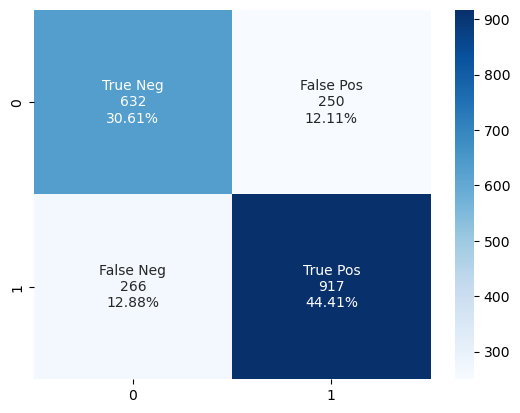

In [69]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM.flatten()/np.sum(CM)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM, annot=labels, fmt='', cmap='Blues')

### INTERPRETATION 

Le modèle de regression logistique a prèdit que sur les 2065 individus : 

1- 632 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 632, et y0 = 632

2- 917 employés ont le burn_out et ceci est exacte (TP) en clair ŷ1 = 920, et y1 = 920

3- 250 ont le burn_out alors qu'ils ne l'ont pas  (FP) en clair ŷ1 = 250, et y0 = 250

4- 266 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 270 , et y1 = 270

### ACCURACY RATE ET ERROR RATE 

In [70]:
Accuracy_Rate = (632+920)/2065 * 100 
Accuracy_Rate

75.15738498789347

l'Accuracy Rate est le taux d'observation correcte qui est le nombre d'observations correctement prédit par le modèle sur le nombre d'observations total. Donc ici nous avons 75,15% de vrais prédictions

In [71]:
Error_Rate = (250+270)/2065 * 100
Error_Rate

25.181598062954

l'Error Rate est le taux d'observations incorrecte qui est le nombre d'observations incorrectement prédit par le modèle sur le nombre d'observations total donc 25% de fausses prédictions

### Courbe roc 

La courbe ROC (Receiver Operating Characteristic) est un graphique du taux de vrais positifs par rapport au taux de faux positifs. Il montre le compromis entre sensibilité et spécificité.

In [72]:
from sklearn import metrics

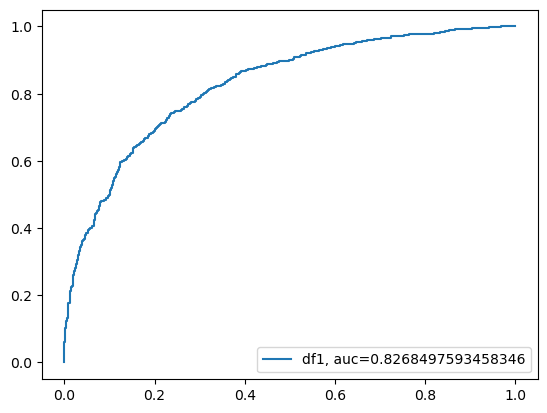

In [73]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [74]:
auc

0.8268497593458346

### INTERPRETATION :

Le score AUC pour ce cas est de 0,82. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.

# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [75]:
# Convertir X en DataFrame Pandas
X_df = pd.DataFrame(X, columns=['2. Quel âge avez-vous ?','SEX_M','IMC','PUBLIC_VS_PRIVE_ET_EPBNL','ANCIENNETE','11conjoint_domicile','ENFANT_BIN',
'13reconfort_entourage','14proche_aidant','service_COVID19','Anatomopathologie','Anesthésie','Biologie médicale',
'Chirurgie tête et cou','Chirurgie générale', 'Chirurgie infantile/pédiatrique', 'Chirurgie Gynéco-Obstétrique', 
'Chirurgie Maxillo-faciale','Chirurgie: Neurochirurgie','Chirurgie: Ophtalmologie', 'Chirurgie : Orthopédie', 'Chirurgie plastique', 
'Chirurgie thoracique et cardiologique','Chirurgie Viscérale et Digestive','Chirurgie Urologique', 'Chirurgie Vasculaire',
'Direction des Soins', 'Enseignement/Formation', 'Enseignement/Recherche', 'Médecine : Allergologie', 'Médecine : Cardiologie', 
'Médecine : Dermatologie', 'Médecine : Endocrinologie', 'Médecine : Hématologie', 'Médecine : Gastroentérologie', 'Médecine Générale', 
'Médecine : Génétique', 'Médecine : Gériatrie', 'Médecine : Gynécologie médicale','Médecine : Infectiologie', 'Médecine Interne',
'Médecine: Néphrologie', 'Médecine : Neurologie','Médecine Nucléaire', 'Médecine : Ophtalmologie', 'Médecine : Oncologie', 
'Médecine : Oto-Rhino-Laryngologie ( ORL)', 'Médecine : Pédiatrie (Néonatologie)', 'Médecine : Pédiatrie (hors néonatologie)', 
'Médecine Physique et de Réadaptation', 'Médecine : Pneumologie', 'Médecine: Radiologie', 'Médecine : Rhumatologie', 'Médecine : Soins palliatifs',
'Médecine : Stomatologie', 'Médecine du travail', 'Médecine: Urgences', 'Médecine: Urgences préhospitalières (SAMU)', 'Médecine Vasculaire / angiologie', 
'Psychiatrie adulte','Psychiatrie: pédopsychiatrie et enfance inadaptée', 'Soins critiques : Réanimation', 'Soins critiques : soins continus ou soins intensifs polyvalents', 'Soins critiques : soins intensifs', 
'Santé Publique', "Service d'Information Médicale", 'Service qualité et gestion des risques', '16TEMPS_COMPLET', '17POSTE_DE_NUIT', 
'18GARDES_NUIT', '19HORAIRES_CONSTANTS', '21PLANNING_2SEM_CONNU', '22DEPASSEMENT_HORAIRE_PREVU_FQC', '23WKEND_W_MOIS_NB', '24ARRET_NB_J_LASTYEAR', 
'25MALADIE_CHRONIQUE', '26ALD','KARASEK_QUANTITE_RAPIDITE', 'KARASEK_COMPLEXITE_INTENSITE','KARASEK_MORCELLEMENT_IMPREVISIBILITE',
'KARASEK_LATITUDE_MARGEMANOEUVRE', 'KARASEK_UTILISATION_COMPETENCE', 'KARASEK_DVLPT_COMPETENCE', 
'KARASEK_SOUTIEN_PRO_SUPERIEURS', 'KARASEK_SOUTIEN_PRO_COLLEGUES', 'KARASEK_SOUTIEN_EMO_SUPERIEURS', 'KARASEK_SOUTIEN_EM0_COLLEGUES', 
 '75CRAINTE_ERREUR_FQC', '76HARCELEMENT_MORAL','78HARCELEMENT_SEXUEL','80SOBD','81EDM_LIFETIME_NB','82ATD', '83ANXIO', '84PSYCHOSTIM',
 '85SUIVI_PSY4', '86SUIVI_PSYCHO', '87NB_CIG', '88CAFE_TASSES','DETA_CUTOFF2','METS_MIN_SEMAINE','CESD1', 'CESD2', 'CESD3', 'CESD5', 'CESD6', 'CESD7',
'CESD9', 'CESD10', 'CESD11', 'CESD13', 'CESD14', 'CESD15','CESD17', 'CESD18', 'CESD19', 'CESD20', 'CESD4', 'CESD8', 'CESD12', 'CESD16', 
'120. Au cours des 30 derniers jours, au bout de combien de temps ( en minutes) vous êtes-vous généralement endormi(e) le soir?', 
'122.DUREE_SOMM_CONTINU','PSQI_TBSOMMEIL_CONTINU',  'PSQI_QUALITE_CONTINU', 
'125. Au cours des 30 derniers jours, combien de fois avez-vous pris des médicaments pour mieux dormir (médicaments prescrits par votre médecin ou vendus sans ordonnance) ?',
'126. Au cours des 30 derniers jours, combien de fois avez-vous eu des difficultés à rester éveillé(e) en conduisant, en mangeant, ou en participant à des activités avec d’autres personnes ?',
'127. Au cours des 30 derniers jours, combien vous a-t-il été difficile d’être suffisamment motivé(e) pour mener à bien vos activités ?'])

In [76]:
# Récupération des coefficients associés à chaque variable indépendante
coef = pd.Series(classifier.coef_[0], index=X_df.columns)

# Tri des variables indépendantes en fonction de leur coefficient
sorted_coef = coef.abs().sort_values(ascending=False)

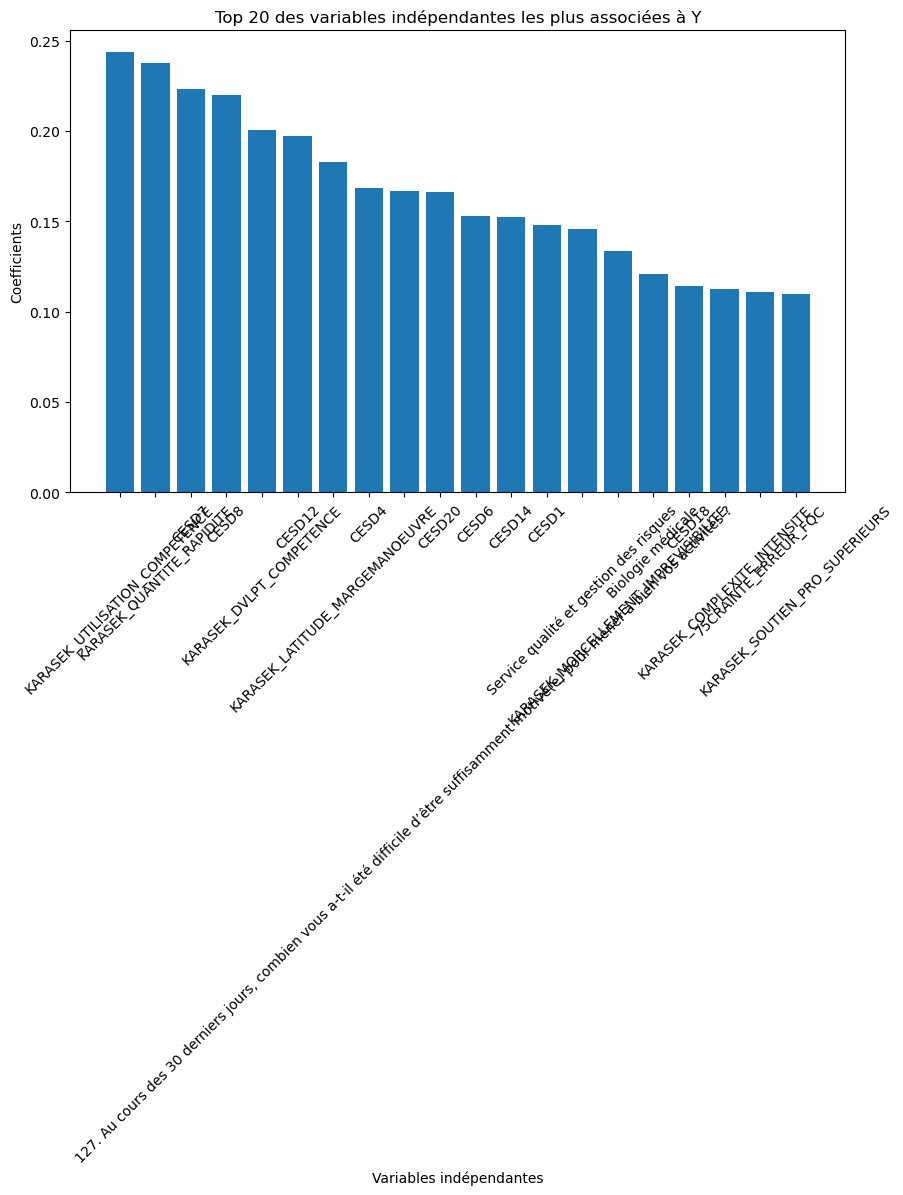

In [77]:
# Tracer un diagramme en barres pour les 20 variables indépendantes les plus associées à Y
plt.figure(figsize=(10,6))
plt.bar(sorted_coef.head(20).index, sorted_coef.head(20))
plt.title("Top 20 des variables indépendantes les plus associées à Y")
plt.xlabel("Variables indépendantes")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

# Construction du modèle SVM (Support Vector Machine) : modèle linéaire

In [78]:
from sklearn.svm import SVC

classifier2 = SVC(kernel= 'linear', random_state = 0,probability=True,)
classifier2.fit(X_train, Y_train)

SVC(kernel='linear', probability=True, random_state=0)

### Faire de nouvelles prédictions 

In [79]:
Y2_pred = classifier2.predict(X_test)
print(Y_test)
print(Y2_pred)

[0 0 0 ... 1 1 1]
[0 1 1 ... 0 1 1]


In [80]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

[0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0
 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1
 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 

In [81]:
with np.printoptions(threshold=np.inf):
    print(Y2_pred)

[0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1
 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 

### MATRICE DE CONFUSION

In [82]:
from sklearn.metrics import confusion_matrix
CM2 = confusion_matrix(Y_test, Y2_pred)
CM2

array([[644, 238],
       [279, 904]], dtype=int64)

<AxesSubplot:>

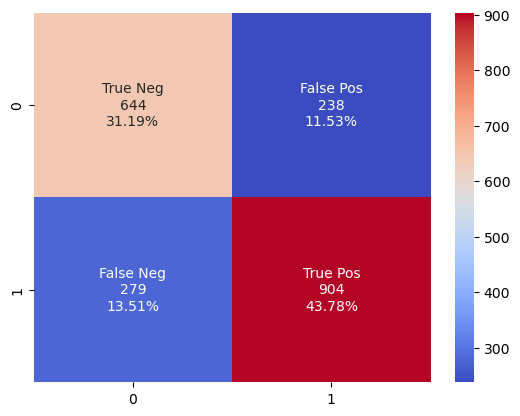

In [83]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM2.flatten()/np.sum(CM2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM2, annot=labels, fmt='', cmap='coolwarm')

In [84]:
print(Y_test.shape)
print(CM2)

(2065,)
[[644 238]
 [279 904]]


### INTERPRETATION

Le modèle de SVM a prèdit que sur les 2065 individus : 

1- 644 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 644, et y0 = 644

2- 904 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 904, et y1 = 904

3- 238 ont le burn_out alors qu'ils ne l'ont pas  (FP) en clair ŷ1 = 238, et y0 = 238

4- 279 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 279 , et y1 = 279

# ACCURACY RATE ET ERROR RATE 

In [85]:
Accuracy_Rate2 = (644+904)/2065 * 100 
Accuracy_Rate2

74.9636803874092

l'Accuracy Rate est le taux d'observation correcte qui est le nombre d'observations correctement prédit par le modèle sur le nombre d'observations total. Donc ici nous avons 74,96% de vrais prédictions

In [86]:
Error_Rate2 = (279+238)/2065 * 100
Error_Rate2

25.036319612590802

l'Error Rate est le taux d'observations incorrecte qui est le nombre d'observations incorrectement prédit par le modèle sur le nombre d'observations total donc 25,03% de fausses prédictions

# Courbe roc 

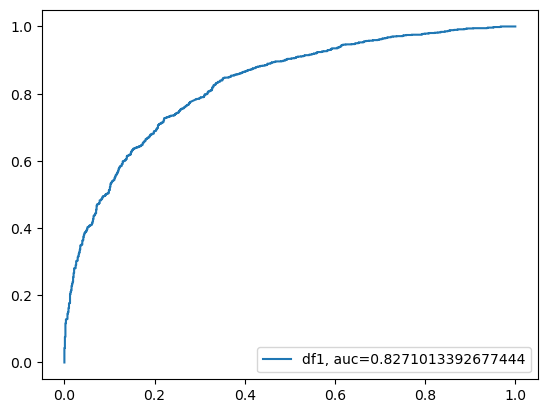

In [87]:
y_pred_proba2 = classifier2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba2)
auc = metrics.roc_auc_score(Y_test, y_pred_proba2)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,82. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.



# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [88]:
# Récupération des coefficients associés à chaque variable indépendante
coef = pd.Series(classifier2.coef_[0], index=X_df.columns)

# Tri des variables indépendantes en fonction de leur coefficient
sorted_coef = coef.abs().sort_values(ascending=False)

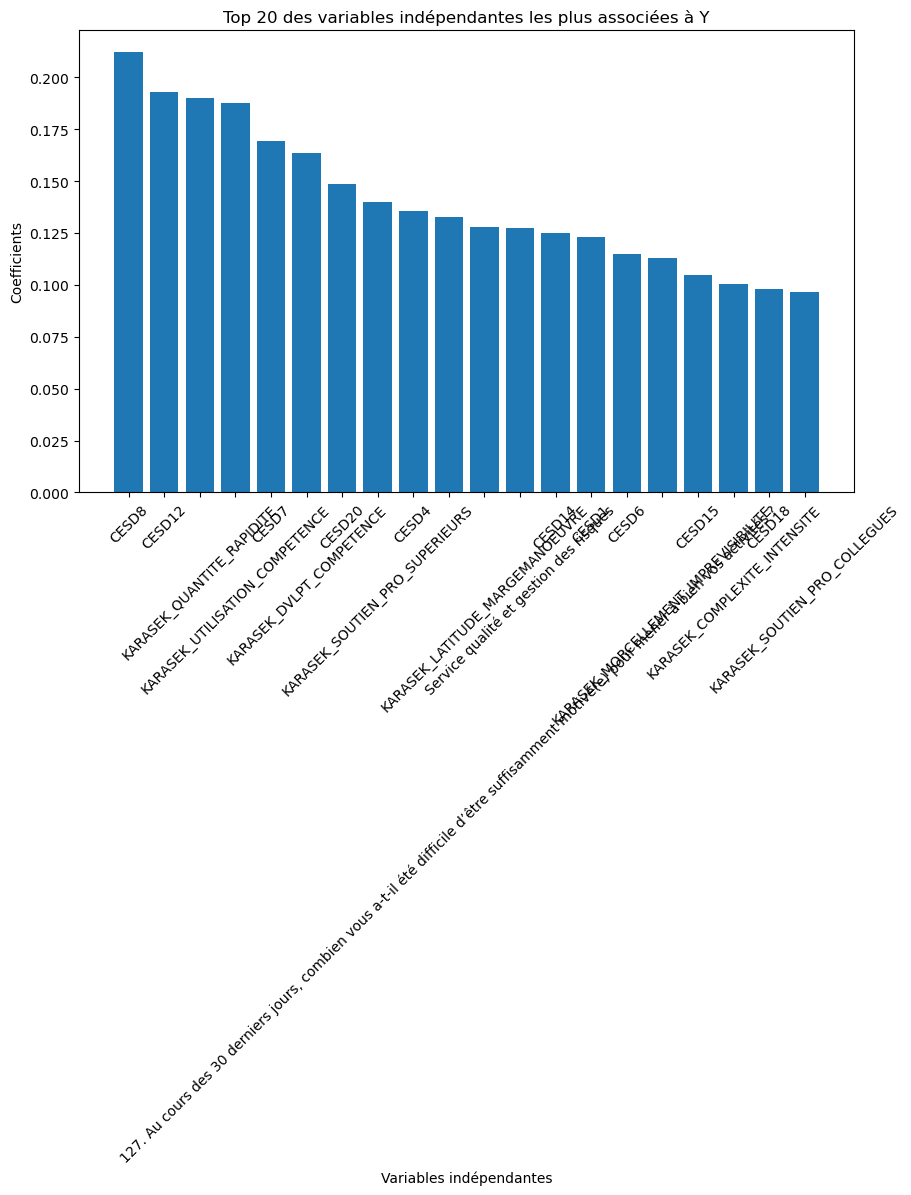

In [89]:
# Tracer un diagramme en barres pour les 20 variables indépendantes les plus associées à Y
plt.figure(figsize=(10,6))
plt.bar(sorted_coef.head(20).index, sorted_coef.head(20))
plt.title("Top 20 des variables indépendantes les plus associées à Y")
plt.xlabel("Variables indépendantes")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

# Construction du modèle Kernel_SVM (Support Vector Machine) : modèle non linéaire

In [90]:
from sklearn.svm import SVC
classifier3 = SVC(kernel= 'rbf', random_state = 0,probability=True,)
classifier3.fit(X_train, Y_train)

SVC(probability=True, random_state=0)

### Faire de nouvelles prédictions 

In [91]:
Y3_pred = classifier3.predict(X_test)
print(Y_test)
print(Y3_pred)

[0 0 0 ... 1 1 1]
[0 1 0 ... 0 1 1]


In [92]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

[0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0
 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1
 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 

In [93]:
with np.printoptions(threshold=np.inf):
    print(Y3_pred)

[0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1
 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 

### MATRICE DE CONFUSION

In [94]:
from sklearn.metrics import confusion_matrix
CM3 = confusion_matrix(Y_test, Y3_pred)
CM3

array([[618, 264],
       [253, 930]], dtype=int64)

<AxesSubplot:>

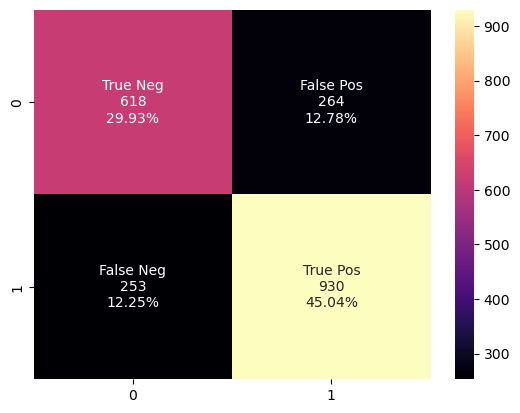

In [95]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM3.flatten()/np.sum(CM3)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM3, annot=labels, fmt='', cmap='magma')

In [96]:
print(Y_test.shape)
print(CM3)

(2065,)
[[618 264]
 [253 930]]


### INTERPRETATION

Le modèle de SVM a prèdit que sur les 2065 individus : 

1- 644 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 644, et y0 = 644

2- 904 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 904, et y1 = 904

3- 238 ont le burn_out alors qu'ils ne l'ont pas  (FP) en clair ŷ1 = 238, et y0 = 238

4- 279 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 279 , et y1 = 279

# ACCURACY RATE ET ERROR RATE 

In [97]:
Accuracy_Rate3 = (644+904)/2065 * 100 
Accuracy_Rate3

74.9636803874092

l'Accuracy Rate est le taux d'observation correcte qui est le nombre d'observations correctement prédit par le modèle sur le nombre d'observations total. Donc ici nous avons 74,96% de vrais prédictions

In [98]:
Error_Rate3 = (279+238)/2065 * 100
Error_Rate3

25.036319612590802

l'Error Rate est le taux d'observations incorrecte qui est le nombre d'observations incorrectement prédit par le modèle sur le nombre d'observations total donc 25,03% de fausses prédictions

# Courbe roc 

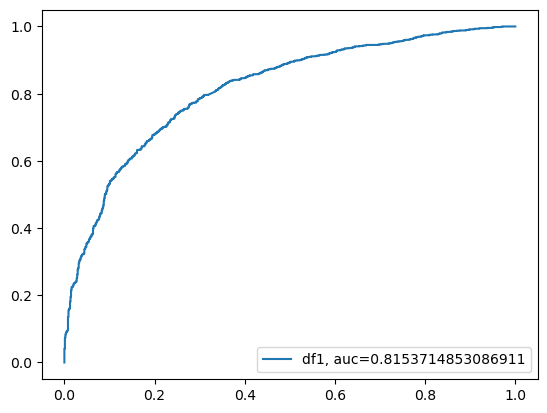

In [99]:
y_pred_proba3 = classifier3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba3)
auc = metrics.roc_auc_score(Y_test, y_pred_proba3)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,81. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.

# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [100]:
from sklearn.inspection import permutation_importance

In [ ]:
# Calcul de l'importance des variables en utilisant la méthode de permutation
result = permutation_importance(classifier3, X_test, Y_test, n_repeats=10, random_state=0)

In [ ]:
# Récupération des importances et des noms de variables associés
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

In [ ]:
# Affichage des 20 variables les plus importantes
plt.figure(figsize=(10,6))
plt.title("Importance des variables")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(20), indices[:20], rotation=90)
plt.xlim([-1, 20])
plt.show()

# Construction du modèle Naive Bayes : modèle non linéaire

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Créer un objet Gaussian Naive Bayes
classifier4 = GaussianNB()

# Entraîner le modèle sur l'ensemble d'apprentissage
classifier4.fit(X_train, Y_train)

### Faire des prédictions sur l'ensemble de test

In [ ]:
Y4_pred = classifier4.predict(X_test)
print(Y_test)
print(Y4_pred)

In [ ]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

In [ ]:
with np.printoptions(threshold=np.inf):
    print(Y4_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
CM4 = confusion_matrix(Y_test, Y4_pred)
CM4

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM4.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM4.flatten()/np.sum(CM4)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM4, annot=labels, fmt='', cmap='inferno')

In [ ]:
print(Y_test.shape)
print(CM4)

### INTERPRETATION

Le modèle de Naives Bayes a prèdit que sur les 2065 individus :

1- 687 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 687, et y0 = 687

2- 710 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 710, et y1 = 710

3- 195 ont le burn_out alors qu'ils ne l'ont pas (FP) en clair ŷ1 = 195, et y0 = 195

4- 473 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 473 , et y1 = 473

## ACCURACY RATE ET ERROR RATE

In [ ]:
Accuracy_Rate4 = (687+710)/2065 * 100 
Accuracy_Rate4

l'Accuracy Rate est le taux d'observation correcte qui est le nombre d'observations correctement prédit par le modèle sur le nombre d'observations total. Donc ici nous avons 67,65% de vrais prédictions

In [ ]:
Error_Rate4 = (195+473)/2065 * 100
Error_Rate4

l'Error Rate est le taux d'observations incorrecte qui est le nombre d'observations incorrectement prédit par le modèle sur le nombre d'observations total donc 32,34% de fausses prédictions

# Courbe roc 

In [ ]:
y_pred_proba4 = classifier4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba4)
auc = metrics.roc_auc_score(Y_test, y_pred_proba4)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,76. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.



# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
# Calcul de l'importance des variables avec la mutual information
mi = mutual_info_classif(X_train, Y_train, discrete_features=True)

# Création d'une DataFrame pour stocker les résultats
mi_df = pd.DataFrame({"feature": X_df.columns, "importance": mi})

# Tri des variables selon leur importance
mi_df = mi_df.sort_values("importance", ascending=False)

# Sélection des 20 variables les plus importantes
top_20 = mi_df.head(20)
top_20 

In [ ]:
# Plotting du résultat sous forme de graphique à barres
sns.barplot(x="importance", y="feature", data=top_20)
plt.show()

# Construction du modèle Decision Tree : modèle non linéaire

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Créer un objet ClassifierTree
classifier5 = DecisionTreeClassifier()

# Entraîner le modèle sur l'ensemble d'apprentissage
classifier5.fit(X_train, Y_train)

### Faire des prédictions sur l'ensemble de test

In [ ]:
Y5_pred = classifier5.predict(X_test)
print(Y_test)
print(Y5_pred)

In [ ]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

In [ ]:
with np.printoptions(threshold=np.inf):
    print(Y5_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
CM5 = confusion_matrix(Y_test, Y5_pred)
CM5

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM5.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM5.flatten()/np.sum(CM5)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM5, annot=labels, fmt='', cmap='viridis')

In [ ]:
print(Y_test.shape)
print(CM5)

## INTERPRETATION 

Le modèle de Decision Tree a prèdit que sur les 2065 individus :

1- 528 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 528, et y0 = 528

2- 762 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 762, et y1 = 762

3- 354 ont le burn_out alors qu'ils ne l'ont pas (FP) en clair ŷ1 = 354, et y0 = 354

4- 421 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 421 , et y1 = 421

## ACCURACY RATE ET ERROR RATE

In [ ]:
Accuracy_Rate5 = (528+762)/2065 * 100 
Accuracy_Rate5

l'Accuracy Rate est le taux d'observation correcte qui est le nombre d'observations correctement prédit par le modèle sur le nombre d'observations total. Donc ici nous avons 62,46% de vrais prédictions

In [ ]:
Error_Rate5 = (354+421)/2065 * 100
Error_Rate5

l'Error Rate est le taux d'observations incorrecte qui est le nombre d'observations incorrectement prédit par le modèle sur le nombre d'observations total donc 37,53% de fausses prédictions

# Courbe roc 

In [ ]:
y_pred_proba5 = classifier5.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba5)
auc = metrics.roc_auc_score(Y_test, y_pred_proba5)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,62. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.



# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [ ]:
# Récupération des importances des variables
importances = classifier5.feature_importances_

# Création d'un DataFrame pour visualiser les importances des variables
feature_importances = pd.DataFrame({'feature': X_df.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

In [ ]:
# Plot des 20 variables les plus importantes
top_features = feature_importances.head(20)
plt.figure(figsize=(10,8))
plt.barh(top_features['feature'], top_features['importance'])
plt.title("Importance des variables dans le modèle de classification Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.show()

# Construction du modèle Random Forest : modèle non linéaire

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialisation du modèle de classification Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
rf_classifier.fit(X_train, Y_train)


### Faire des prédictions sur l'ensemble de test

In [ ]:
Y6_pred = rf_classifier.predict(X_test)
print(Y_test)
print(Y6_pred)

In [ ]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

In [ ]:
with np.printoptions(threshold=np.inf):
    print(Y6_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
CM6 = confusion_matrix(Y_test, Y6_pred)
CM6

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM6.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM6.flatten()/np.sum(CM6)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM6, annot=labels, fmt='', cmap='Pastel1')

In [ ]:
print(Y_test.shape)
print(CM6)

## INTERPRETATION 

Le modèle de Decision Tree a prèdit que sur les 2065 individus :

1- 618 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 618, et y0 = 618

2- 930 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 930, et y1 = 930

3- 264 ont le burn_out alors qu'ils ne l'ont pas (FP) en clair ŷ1 = 264, et y0 = 264

4- 253 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 253 , et y1 = 253

## ACCURACY RATE ET ERROR RATE

In [ ]:
Accuracy_Rate6 = (618+930)/2065 * 100 
Accuracy_Rate6

l'Accuracy Rate est le taux d'observation correcte qui est le nombre d'observations correctement prédit par le modèle sur le nombre d'observations total. Donc ici nous avons 74,96% de vrais prédictions

In [ ]:
Error_Rate6 = (264+253)/2065 * 100
Error_Rate6

l'Error Rate est le taux d'observations incorrecte qui est le nombre d'observations incorrectement prédit par le modèle sur le nombre d'observations total donc 25,03% de fausses prédictions

# Courbe roc 

In [ ]:
y_pred_proba6 = rf_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba6)
auc = metrics.roc_auc_score(Y_test, y_pred_proba6)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,82. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.



# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [ ]:
# Récupérer l'importance des variables
importances = rf_classifier.feature_importances_

# Créer un DataFrame pour les importances
df_importances = pd.DataFrame({'feature': X_df.columns, 'importance': importances})

# Trier les variables en fonction de leur importance
df_importances_sorted = df_importances.sort_values('importance', ascending=False).head(20)

In [ ]:
# Plot des variables importantes
plt.figure(figsize=(10, 8))
plt.barh(df_importances_sorted['feature'], df_importances_sorted['importance'])
plt.title('Les 20 variables les plus importantes dans le modèle de Random Forest')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

# Construction du modèle K-Nearest Neighbors ou KNN : modèle non linéaire

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialisation du modèle de classification KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle sur l'ensemble d'entraînement
knn_classifier.fit(X_train, Y_train)

### Faire des prédictions sur l'ensemble de test

In [ ]:
Y7_pred = knn_classifier.predict(X_test)
print(Y_test)
print(Y7_pred)

In [ ]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

In [ ]:
with np.printoptions(threshold=np.inf):
    print(Y7_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
CM7 = confusion_matrix(Y_test, Y7_pred)
CM7

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM7.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM7.flatten()/np.sum(CM7)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM7, annot=labels, fmt='', cmap='tab10')

In [ ]:
print(Y_test.shape)
print(CM7)

## INTERPRETATION

Le modèle KNN Neighbors a prèdit que sur les 2065 individus :

1- 636 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 636, et y0 = 636

2- 739 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 739, et y1 = 739

3- 246 ont le burn_out alors qu'ils ne l'ont pas (FP) en clair ŷ1 = 246, et y0 = 246

4- 444 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 444 , et y1 = 444

## ACCURACY RATE ET ERROR RATE

In [ ]:
Accuracy_Rate7 = (636+739)/2065 * 100 
Accuracy_Rate7

l'Accuracy Rate est le taux d'observation correcte qui est le nombre d'observations correctement prédit par le modèle sur le nombre d'observations total. Donc ici nous avons 66,58% de vrais prédictions



In [ ]:
Error_Rate7 = (246+444)/2065 * 100
Error_Rate7

l'Error Rate est le taux d'observations incorrecte qui est le nombre d'observations incorrectement prédit par le modèle sur le nombre d'observations total donc 33,41% de fausses prédictions

# Courbe roc 


In [ ]:
y_pred_proba7 = knn_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba7)
auc = metrics.roc_auc_score(Y_test, y_pred_proba7)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,72. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.



# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# Effectuer une analyse de permutation pour obtenir les importances des variables
result = permutation_importance(knn_classifier, X_test, Y_test, n_repeats=10, random_state=42)

# Créer un DataFrame avec les noms de variables et leurs importances
importances_df = pd.DataFrame({'feature': X_df.columns, 'importance': result.importances_mean})

# Trier les variables par ordre d'importance décroissante
importances_df = importances_df.sort_values('importance', ascending=False).reset_index(drop=True)



In [ ]:
sns.barplot(x='importance', y='feature', data=importances_df.head(20))
plt.title('Importance des variables - KNN')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

# Construction du modèle Gradient Boosting : modèle non linéaire

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Initialisation du modèle de classification Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
gb_classifier.fit(X_train, Y_train)


### Faire des prédictions sur l'ensemble de test

In [ ]:
Y8_pred = gb_classifier.predict(X_test)
print(Y_test)
print(Y8_pred)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Calcul de la précision du modèle
accuracy = accuracy_score(Y_test, Y8_pred)
print("Précision : ", accuracy)

In [ ]:
with np.printoptions(threshold=np.inf):
    print(Y_test)

In [ ]:
with np.printoptions(threshold=np.inf):
    print(Y8_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
CM8 = confusion_matrix(Y_test, Y8_pred)
CM8

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                CM8.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     CM8.flatten()/np.sum(CM7)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM8, annot=labels, fmt='', cmap='crest')

In [ ]:
print(Y_test.shape)
print(CM8)

## INTERPRETATION 

Le modèle Gradient Boosting a prèdit que sur les 2065 individus :

1- 633 employés n'ont pas le burn_out et ceci est exacte (TN) en clair ŷ0 = 633, et y0 = 633

2- 928 employés ont le burn_out et ceci est exacte (TP) en clair ŷ = 928, et y1 = 928

3- 249 ont le burn_out alors qu'ils ne l'ont pas (FP) en clair ŷ1 = 249, et y0 = 249

4- 255 n'ont pas le burn_out alors qu'ils l'ont (FN) en clair ŷ0 = 255 , et y1 = 255

## ACCURACY RATE ET ERROR RATE

In [ ]:
Accuracy_Rate8 = (633+928)/2065 * 100 
Accuracy_Rate8

l'Accuracy Rate est le taux d'observation correcte qui est le nombre d'observations correctement prédit par le modèle sur le nombre d'observations total. Donc ici nous avons 75,59% de vrais prédictions

In [ ]:
Error_Rate8 = (249+255)/2065 * 100
Error_Rate8

l'Error Rate est le taux d'observations incorrecte qui est le nombre d'observations incorrectement prédit par le modèle sur le nombre d'observations total donc 24,40% de fausses prédictions

# Courbe roc 

In [ ]:
y_pred_proba8 = gb_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba8)
auc = metrics.roc_auc_score(Y_test, y_pred_proba8)
plt.plot(fpr,tpr,label="df1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# La courbe roc montre la spécifité et la sensibilité

### INTERPRETATION :
Le score AUC pour ce cas est de 0,82. Le score AUC 1 représente un classificateur parfait et 0,5 représente un classificateur sans valeur.

# Top 20 des variables indépendantes qui sont les plus associées à mon Y

In [ ]:
# Récupération des importances des variables
importances = gb_classifier.feature_importances_

# Création d'un DataFrame avec les noms de variables et leurs importances
importances_df = pd.DataFrame({'feature': X_df.columns, 'importance': importances})

# Tri des variables en fonction de leur importance
importances_df_sorted = importances_df.sort_values('importance', ascending=False)

In [ ]:
# Plot des 20 premières variables et de leurs importances associées
plt.figure(figsize=(12,8))
plt.title('Top 20 des variables importantes pour Gradient Boosting')
plt.barh(importances_df_sorted['feature'][:20], importances_df_sorted['importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()

# DEEP LEARNING

### Artificial Neural Network (ANN)

In [ ]:
import keras
from keras.models import Sequential # C'est le module qui va nous permettre d'initialiser le reseau de neuronne 
from keras.layers import Dense # C'est le module qui nous permet de créer les couches des réseaux de neuronne 
from keras.layers import Dropout

In [ ]:
# Initialisation du réseau de neurones
classifier = Sequential()

# Ajout de la couche d'entrée et de la première couche cachée
classifier.add(Dense(units=64, activation='relu', input_dim=129,))
classifier.add(Dropout(0.2))

# Ajout de la deuxième couche cachée
classifier.add(Dense(units=32, activation='relu'))
classifier.add(Dropout(0.2))

# Ajout de la troisième couche cachée
classifier.add(Dense(units=16, activation='relu'))
classifier.add(Dropout(0.2))

# Ajout de la couche de sortie
classifier.add(Dense(units=1, activation='sigmoid'))

# Compilation du réseau de neurones
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du réseau de neurones
classifier.fit(X_train, Y_train, batch_size=10, epochs=100)

# Évaluation du modèle sur le jeu de test
score = classifier.evaluate(X_test, Y_test)
print("Loss :", score[0])
print("Accuracy :", score[1])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)